### 785. Is Graph Bipartite?

Given an undirected graph, return true if and only if it is bipartite.

Recall that a graph is bipartite if we can split its set of nodes into two independent subsets A and B, such that every edge in the graph has one node in A and another node in B.

The graph is given in the following form: graph[i] is a list of indexes j for which the edge between nodes i and j exists.  Each node is an integer between 0 and graph.length - 1.  There are no self edges or parallel edges: graph[i] does not contain i, and it doesn't contain any element twice.


In [3]:
import networkx as nx

In [40]:
class Solution:
    def isBipartite(self, graph) -> bool:
        def solve(u, color, visited):
            for v in graph[u]:
                if not visited[v]:
                    visited[v] = True
                    color[v] = 1 - color[u]
                    if not solve(v, color, visited):
                        return False
                elif color[u] == color[v]:
                    return False
            return True

        n = len(graph)
        color = [0] * n
        visited = [False] * n
        for i in range(len(graph)):
            if not visited[i]:
                visited[i] = True
                color[i] = 0
                if not solve(i, color, visited):
                    return False
        return True

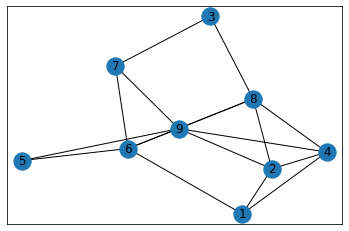

In [41]:
graph = [[],[2,4,6],[1,4,8,9],[7,8],[1,2,8,9],[6,9],[1,5,7,8,9],[3,6,9],[2,3,4,6,9],[2,4,5,6,7,8]]
g = nx.Graph()
for i in range(len(graph)):
    g.add_edges_from([(i, j) for j in graph[i]])

nx.draw_networkx(g)

In [42]:
sol = Solution()

sol.isBipartite(graph)


visited 0
visited 1
(1, 2) not visited
visited 2
(2, 4) not visited
visited 4


False

### 133. Clone Graph

Given a reference of a node in a connected undirected graph.

Return a deep copy (clone) of the graph.

Each node in the graph contains a val (int) and a list (List[Node])
of its neighbors.

In [1]:
# definition
class Node:
    def __init__(self, val = 0, neighbors = None):
        self.val = val
        self.neighbors = neighbors if neighbors is not None else []

In [2]:
class Solution:
    def cloneGraph(self, node: 'Node') -> 'Node':
        if not node: return None

        def clone(node):
            if node in self.memo:
                return self.memo[node]
            """
            这样不行，永远都无法完成赋值，一直在递归。

            self.memo[node] = Node(node.val, [clone(u) for u in node.neighbors])
            """

            self.memo[node] = Node(node.val)
            self.memo[node].neighbors = [clone(u) for u in node.neighbors]
            return self.memo[node]

        self.memo = dict()
        return clone(node)

    def cloneGraph(self, node: 'Node') -> 'Node':
        if not node: return node
        queue = [node]
        memo = {node: Node(node.val)}
        while queue:
            head = queue.pop(0)
            for u in head.neighbors:
                if u not in memo:
                    memo[u] = Node(u.val)
                    queue.append(u)
                memo[head].neighbors.append(memo[u])
        return memo[node]
